In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format 

C:\Users\manea\AppData\Local\Temp\ipykernel_5744\4190095825.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('./loan.csv')

## Understanding the data first

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [4]:
data.shape

(39717, 111)

In [5]:
data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

## Data Understanding

Right away the first thing we notice is the number of columns is very high so we need to be able to automate process of cleaning the data

lets see the number of columns with missing values

In [6]:
(data.isna().sum()/data.shape[0])*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

There we can see some columns with 100% missing values means those columns are useless

So let us set a threshold of 30% as a level to be able to remove the columns having missing values more than 30%

In [7]:
high_missing_perc_cols = [feature for feature in data.columns if ((data[feature].isna().sum()/data.shape[0])*100)>30]

In [8]:
len(high_missing_perc_cols)

58

Above you can see we have identified 58 columns as having more than 30% missing values

We will be dropping these columns as we cannot do anything about these columns as in we cannot fix the missing values in these cols

In [9]:
data.drop(high_missing_perc_cols,axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [10]:
new_data = data.drop(high_missing_perc_cols,axis=1)

#### So we get a new data with 53 columns

In [11]:
new_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

loan_status is the target variable

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
(new_data.isna().sum()/new_data.shape[0])*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal     

There are still some missing values but we can deal with them later lets clear our understanding of the variables first

#### Difference between loan_amount, funded_amount and funded_amount_inv

- Loan_amount = The loan amount applied by the borrower
- funded_amount = The total amount commited to that loan
- funded_amount_inv = The total amount commited by the investors to that loan

#### What does earliest_cr_line mean?

- earliest_cr_line = refers to the date when the borrower first opened a credit account

#### Dropping some more columns

* We don't need "title" because its a extended column of "purpose" so we will drop the "title" column

Also lets drop "id" and "member_id" as we don't need them
We will also drop "emp_title" as it is not going to be 

we will also drop "url" column and "last_payment_d" column

we will also be dropping last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens

In [14]:
new_data = new_data.drop(['title','id','member_id','emp_title','url','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens',
                          'policy_code','acc_now_delinq','delinq_amnt'],axis=1)

In [15]:
new_data.shape

(39717, 40)

In [16]:
(new_data.isna().sum()/new_data.shape[0])*100

loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
pymnt_plan                0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
initial_list_status       0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_re

## Data Cleaning

In [17]:
print("The columns with missing values are:",[feature for feature in new_data.columns if new_data[feature].isna().sum() > 0])

The columns with missing values are: ['emp_length', 'revol_util', 'pub_rec_bankruptcies']


#### fixing emp_length

In [18]:
new_data['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

- There are other values than digits we need to remove non-numeric values
- There are some missing values so it needs to be addressed

In [19]:
# Lets first remove non-numeric values and convert the column to a numeric column and also put 0 as we cannot figure out what will be 
# work exp properly with any of the mean,median,mode methods

# lets write a small function to do this we will also need re library
import re

def digits_only(input):

    if isinstance(input, str):
        return ''.join(re.findall(r'\d', input))
    else:
        return 0



new_data['emp_length'] = new_data['emp_length'].apply(lambda x: digits_only(x))

In [20]:
new_data['emp_length'] = pd.to_numeric(new_data['emp_length'])

So in the above cell we figured a way to do both fix missing values as well as fix the non-numeric values

In [21]:
# Lets see if the data cleaning is done properly
new_data['emp_length'].isna().sum()

0

#### fixing revol_util

- revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [22]:
new_data['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [23]:
# we have to remove the % from revol_util and we should again write a function so that we can reuse it if needed again

# function to remove % symbol
def clean_string(input:str,removal_element:str):
    return input.strip(removal_element)

In [24]:
new_data['revol_util'] = new_data['revol_util'].apply(lambda x: clean_string(x,'%') if type(x)== str else x).astype(float)

In [25]:
new_data['revol_util']

0       83.70
1        9.40
2       98.50
3       21.00
4       53.90
         ... 
39712   13.10
39713   26.90
39714   19.40
39715    0.70
39716   51.50
Name: revol_util, Length: 39717, dtype: float64

In [26]:
# dropping the empty rows in revol_util
new_data = new_data[~(new_data['revol_util'].isna())]

In [27]:
new_data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

There is another such column with % symbol so we can reuse our function to remove the % symbol

In [28]:
new_data['int_rate'] = new_data['int_rate'].apply(lambda x: clean_string(x,'%'))

In [29]:
new_data['int_rate'] = pd.to_numeric(new_data['int_rate'])

#### Fixing pub_rec_bankruptcies

there are some missing values in here, lets assume that even if there might be some recorded bankruptcies they are not reported so we assume that there were no recorded bankruptcies

In [30]:
new_data['pub_rec_bankruptcies'].describe()

count   38970.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

In [31]:
# we will just enter 0 as it was not recorded as a bankruptcy
new_data['pub_rec_bankruptcies'] = new_data['pub_rec_bankruptcies'].fillna(0.0)

In [32]:
new_data['pub_rec_bankruptcies'].isna().sum()

0

#### Outlier Removal in annual income

Now I feel that the only column where we should be worried about outliers is annual income
- Reason: Annual income is a factor which has a impact from various other external sources like skills, experience or even luck; this is the reason why we are specifically doing outlier removal only for annual income as this is the only such column which has effect of data outside the scope of this case study

In [33]:
new_data['annual_inc'].dtype

dtype('float64')

In [34]:
new_data['annual_inc'] = new_data['annual_inc'].apply(lambda x: int(x))

In [35]:
new_data['annual_inc'].dtype

dtype('int64')

In [36]:
new_data['annual_inc'].value_counts()

annual_inc
60000     1505
50000     1057
40000      876
45000      827
30000      823
          ... 
25404        1
47508        1
130490       1
100079       1
27376        1
Name: count, Length: 5283, dtype: int64

In [37]:
new_data['annual_inc'].describe()

count     39667.00
mean      68999.52
std       63789.47
min        4000.00
25%       40516.00
50%       59000.00
75%       82400.00
max     6000000.00
Name: annual_inc, dtype: float64

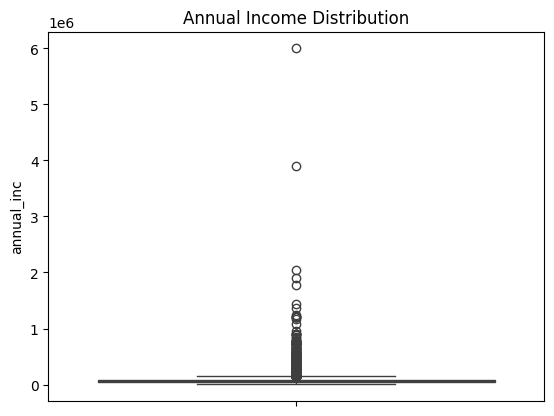

In [38]:
# lets first see how the outliers look like
sns.boxplot(new_data['annual_inc'])

plt.title('Annual Income Distribution')

# Show the plot
plt.show()

In [39]:
# we can see that there are some outliers lets remove the outliers
print("Number of rows before outlier removal: ", new_data.shape[0])
new_data = new_data[new_data['annual_inc'] < np.percentile(new_data['annual_inc'],90)]
print("Number of rows after outlier removal: ", new_data.shape[0])

Number of rows before outlier removal:  39667
Number of rows after outlier removal:  35692


In [40]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,...,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,INDIVIDUAL,0.00
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,INDIVIDUAL,0.00
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,...,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,INDIVIDUAL,0.00
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,INDIVIDUAL,0.00
4,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,RENT,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,INDIVIDUAL,0.00


> now we are done with data cleaning process

In [41]:
sns.set_palette("muted")

### Lets Begin with our Analysis Phase

We will also be deriving columns as we go whereever needed

> ## Focus:
- The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

## Univariate Analysis

In [42]:
# lets begin with our target variable i.e. loan status
new_data['loan_status'].describe()

count          35692
unique             3
top       Fully Paid
freq           29514
Name: loan_status, dtype: object

In [43]:
new_data['loan_status'].value_counts()

loan_status
Fully Paid     29514
Charged Off     5184
Current          994
Name: count, dtype: int64

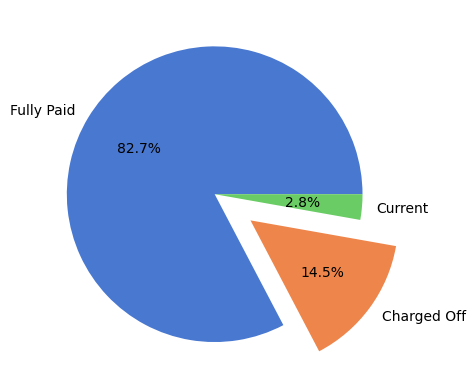

In [44]:
plt.pie(new_data['loan_status'].value_counts(),labels=["Fully Paid","Charged Off","Current"],explode=[0,0.3,0],autopct='%1.1f%%')
plt.show()

we have 14.5% cases being charged off as of now

In [45]:
# lets analyze loan amounts as we need to see what are the ticket sizes for loan amounts
new_data['loan_amnt'].describe()

count   35692.00
mean    10567.18
std      6945.68
min       500.00
25%      5000.00
50%      9000.00
75%     14600.00
max     35000.00
Name: loan_amnt, dtype: float64

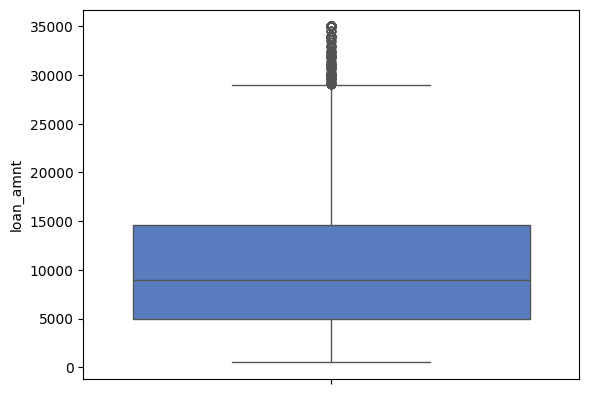

In [46]:
sns.boxplot(new_data['loan_amnt'])
plt.show()

note that the mean loan amount is 10000 and the median is 9000 so it does not have many outliers

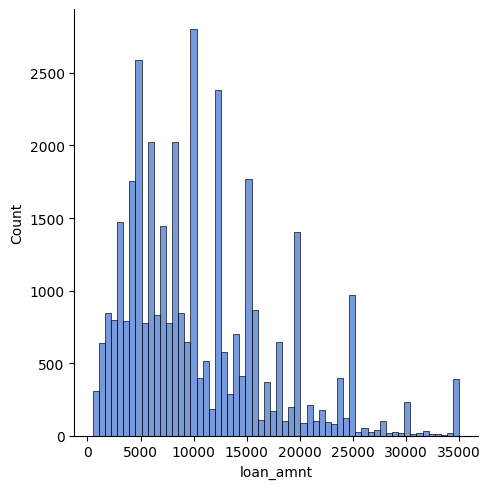

In [47]:
sns.displot(new_data['loan_amnt'])
plt.show()

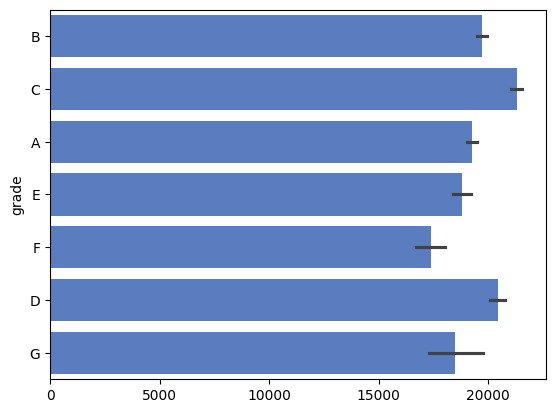

In [48]:
# now with the above distribution lets also see how is the grades of loans
sns.barplot(new_data['grade'])
plt.show()

We have a lot of C and D grade loans will return to these for segmented univariate analysis again

In [49]:
# lets see what are the interest rates
new_data['int_rate'].describe()

count   35692.00
mean       11.94
std         3.67
min         5.42
25%         8.94
50%        11.78
75%        14.35
max        24.40
Name: int_rate, dtype: float64

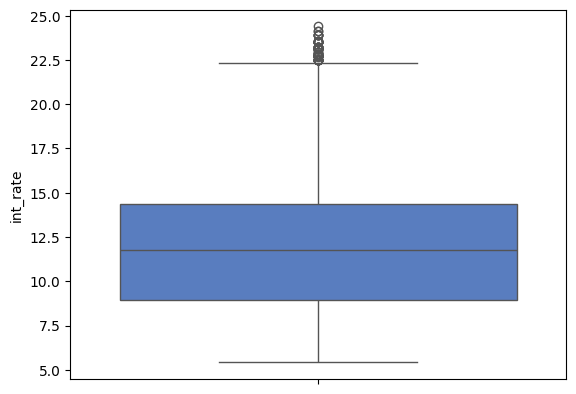

In [50]:
sns.boxplot(new_data['int_rate'])
plt.show()

Mostly the interest rates are around 8 to 14 percent

In [51]:
new_data['term'].value_counts()

term
36 months    26314
60 months     9378
Name: count, dtype: int64

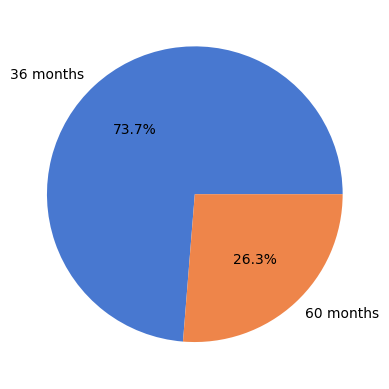

In [52]:
# lets see distribution of loan tenure
plt.pie(new_data['term'].value_counts(),labels=["36 months","60 months"],autopct='%1.1f%%')
plt.show()

so seems like most of the people go for low tenure loans which means they must be having higher installment amounts

In [53]:
new_data['installment'].describe()

count   35692.00
mean      306.00
std       193.16
min        15.69
25%       161.93
50%       266.52
75%       402.24
max      1302.69
Name: installment, dtype: float64

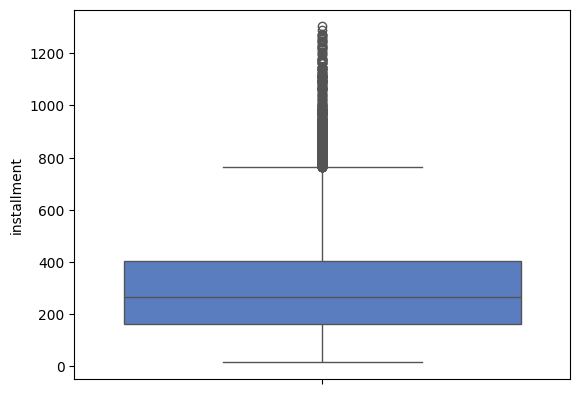

In [54]:
# lets see what the installment amounts are
sns.boxplot(new_data['installment'])
plt.show()

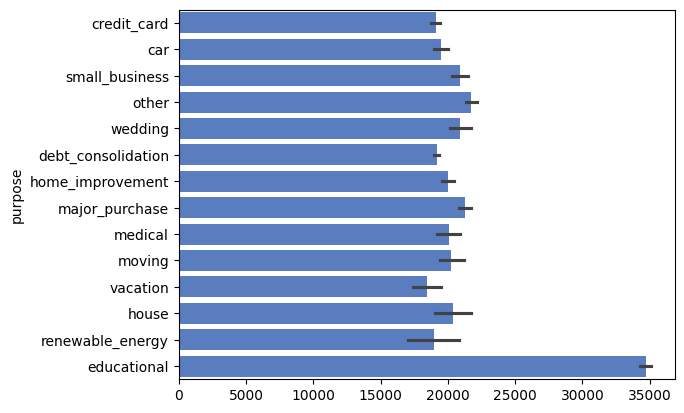

In [55]:
# lets see the most common purpose of loans
sns.barplot(new_data['purpose'])
plt.show()

the educational loans are very high

An important factor is dti (debt to income ratio) lets see what is the distribution for dti

DTI Ratio = (Total Monthly Debt Payments / Gross Monthly Income) * 100


In [56]:
new_data['dti'].describe()

count   35692.00
mean       13.59
std         6.68
min         0.00
25%         8.50
50%        13.76
75%        18.89
max        29.99
Name: dti, dtype: float64

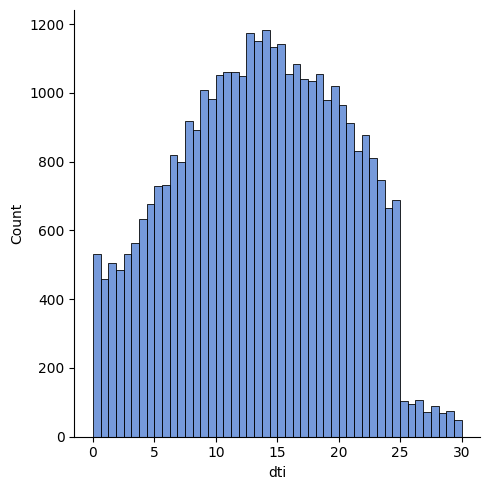

In [57]:
# checking the distribution of dti
sns.displot(new_data['dti'])
plt.show()

we can consider/assume that the dti above 20 are on the bad side 

In [58]:
# lets only consider columns that are related to the loan status i.e. the columns to analyze here are the onces which are most likely considered before loan disbursal
numeric_related_cols = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc','pub_rec_bankruptcies']

In [59]:
new_data[numeric_related_cols].corr()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
loan_amnt,1.00,0.94,0.29,0.93,0.16,0.39,0.11,-0.04,-0.00,0.16,-0.04,0.32,0.07,0.23,-0.03
funded_amnt_inv,0.94,1.00,0.29,0.90,0.17,0.37,0.11,-0.05,-0.01,0.15,-0.05,0.29,0.08,0.22,-0.03
int_rate,0.29,0.29,1.00,0.27,0.01,0.05,0.11,0.15,0.13,-0.01,0.10,0.07,0.47,-0.07,0.09
installment,0.93,0.90,0.27,1.00,0.13,0.39,0.09,-0.03,0.00,0.15,-0.04,0.31,0.11,0.20,-0.03
emp_length,0.16,0.17,0.01,0.13,1.00,0.22,0.06,0.01,0.01,0.10,0.05,0.16,0.02,0.20,0.05
annual_inc,0.39,0.37,0.05,0.39,0.22,1.00,-0.05,0.02,0.03,0.26,-0.00,0.37,0.05,0.38,0.00
dti,0.11,0.11,0.11,0.09,0.06,-0.05,1.00,-0.03,0.01,0.30,-0.01,0.29,0.27,0.25,0.00
delinq_2yrs,-0.04,-0.05,0.15,-0.03,0.01,0.02,-0.03,1.00,0.01,0.01,0.01,-0.07,-0.04,0.07,0.00
inq_last_6mths,-0.00,-0.01,0.13,0.00,0.01,0.03,0.01,0.01,1.00,0.09,0.03,-0.03,-0.07,0.11,0.02
open_acc,0.16,0.15,-0.01,0.15,0.10,0.26,0.30,0.01,0.09,1.00,0.01,0.28,-0.11,0.68,0.01


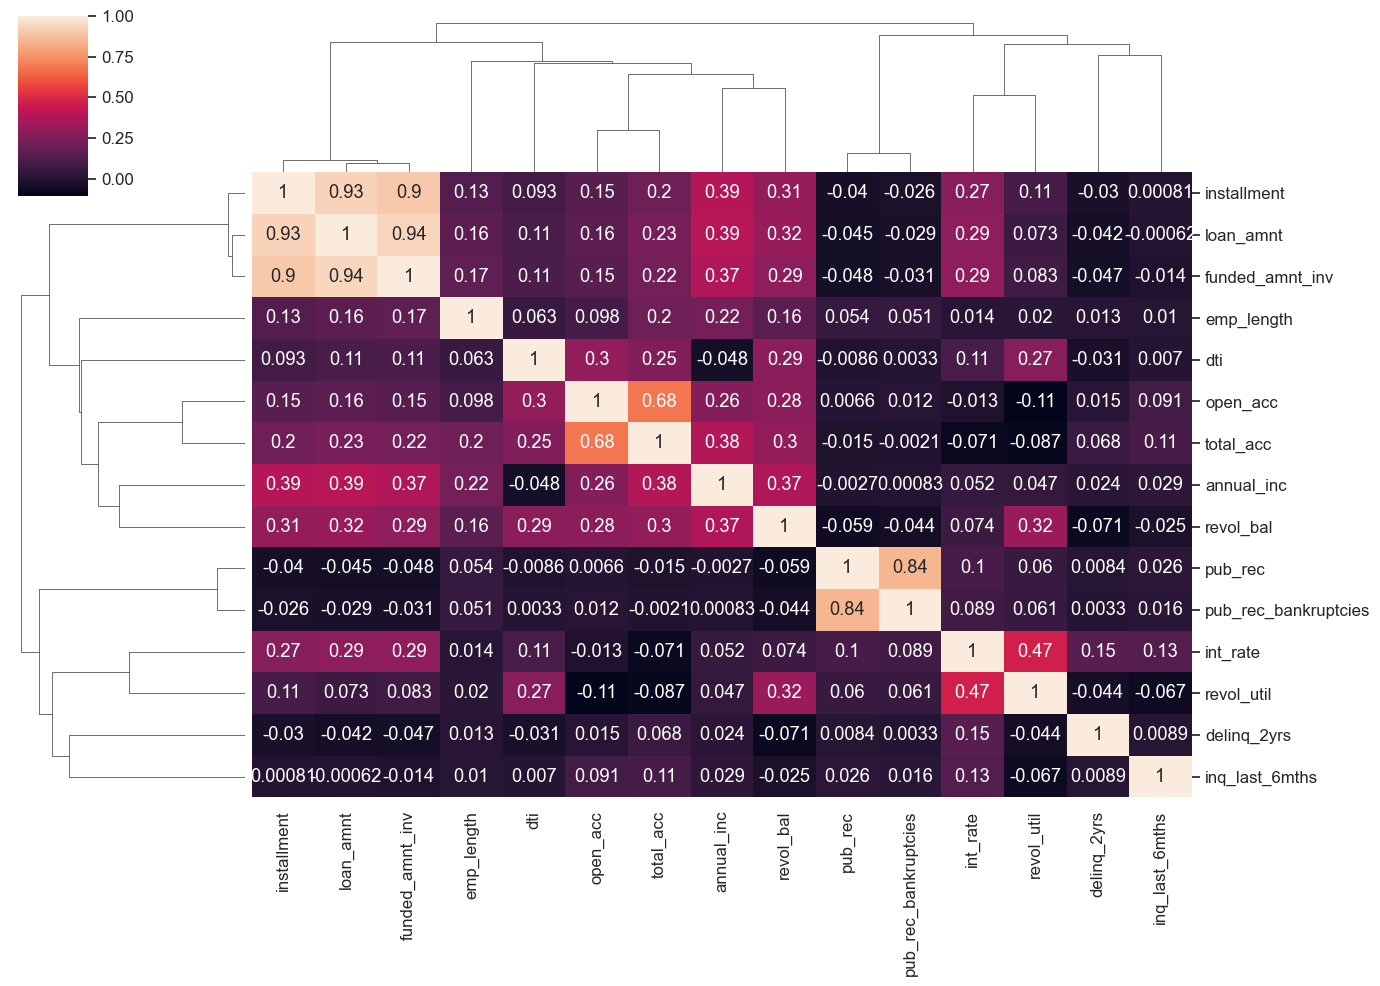

In [60]:
# lets first see a correlation matrix to understand the relation of the variables with each other
sns.set_theme(font_scale=1.1)
sns.clustermap(new_data[numeric_related_cols].corr(),annot=True,figsize=(14, 10))
plt.show()

## Derive a few columns that we need

In [61]:
new_data['loan_amnt_buckets'] = pd.cut(new_data['loan_amnt'], [0, 7000, 14000, 21000, 28000,new_data['loan_amnt'].max()], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000+'])

In [62]:
new_data['dti_buckets'] = pd.cut(new_data['dti'], [-1, 5.0, 10.0, 15.0, 20.0, 25.0, new_data['dti'].max()], labels=['0-5', '5-10', '10-15', '15-20', '20-25','25+'])

In [63]:
new_data['annual_inc_buckets'] = pd.cut(new_data['annual_inc'], [0, 20000, 40000, 60000, 80000,new_data['annual_inc'].max()], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [64]:
new_data['int_rate_buckets'] = pd.cut(new_data['int_rate'], [0, 3, 6, 10, 13, 16, new_data['int_rate'].max()], labels=['0-3', '3-6', '6-10','10-13', '13-16', '16+'])

In [65]:
new_data['issue_d'] = pd.to_datetime(new_data['issue_d'], format='%b-%y')

new_data['year'] = new_data['issue_d'].dt.year
new_data['month'] = new_data['issue_d'].dt.month

## Bivariate Analysis

In [66]:
# lets group the data where we can have percent of people who have been charged off for each loan_amnt buckets that we created earlier
amnt_status_group = new_data.groupby(['loan_amnt_buckets','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [67]:
amnt_status_group

loan_status,loan_amnt_buckets,Charged Off,Current,Fully Paid
0,0-7000,1825,160,11852
1,7000-14000,1684,293,10536
2,14000-21000,1060,308,5015
3,21000-28000,427,144,1612
4,28000+,188,89,499


In [68]:
# Creating the percentage column
amnt_status_group['Charged_Off_Percentage'] = (amnt_status_group['Charged Off']/(amnt_status_group['Charged Off'] + amnt_status_group['Current'] + amnt_status_group['Fully Paid']))*100

In [69]:
amnt_status_group

loan_status,loan_amnt_buckets,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,0-7000,1825,160,11852,13.19
1,7000-14000,1684,293,10536,13.46
2,14000-21000,1060,308,5015,16.61
3,21000-28000,427,144,1612,19.56
4,28000+,188,89,499,24.23


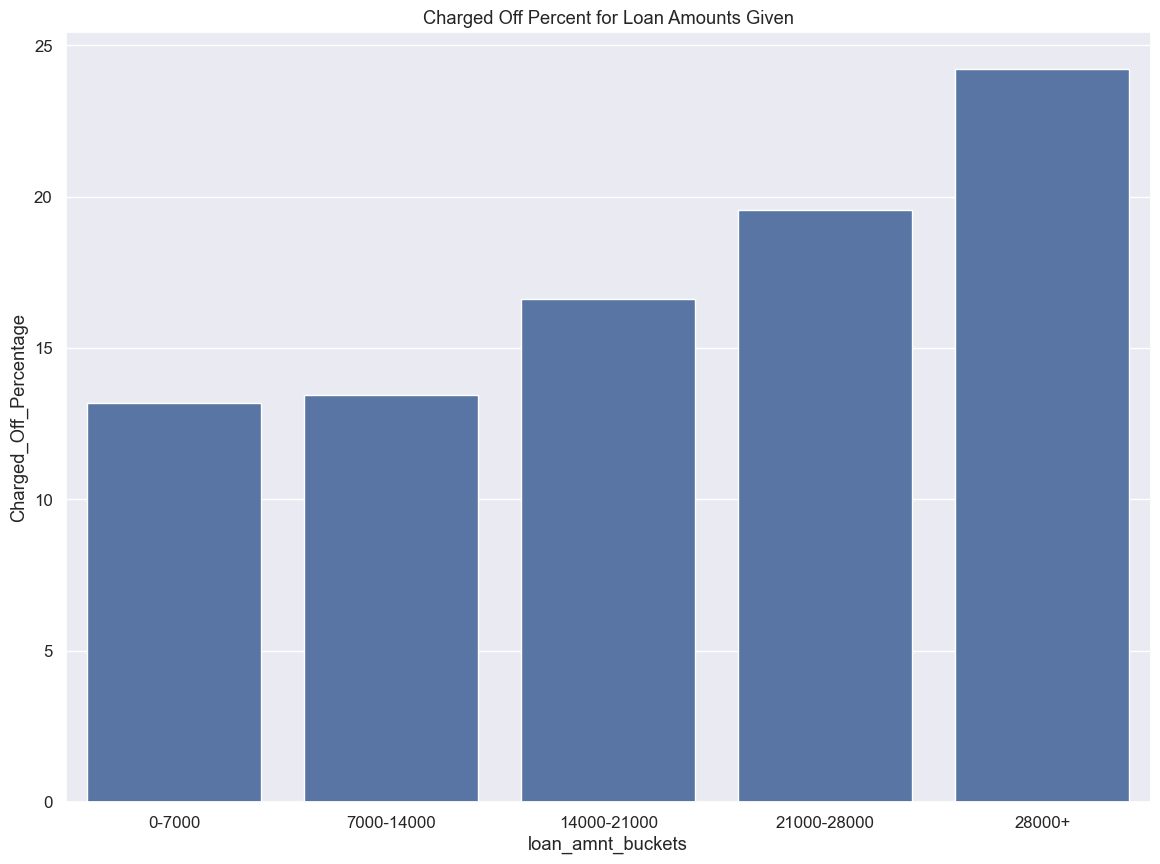

In [70]:
plt.figure(figsize=(14,10))

sns.barplot(y=amnt_status_group['Charged_Off_Percentage'],x=amnt_status_group['loan_amnt_buckets'])
plt.title("Charged Off Percent for Loan Amounts Given")
plt.show()

- In the above chart we can clearly see in terms of percent the loans with higher ticket size are a problem this is where the bussiness can focus
- So the buckets which fall from 21000 and above are a huge amount of contributors to the defaulters

In [71]:
# lets group the data where we can have percent of people who have been charged off for each dti buckets that we created earlier
dti_status_group = new_data.groupby(['dti_buckets','loan_status']).count().unstack()['dti'].reset_index()

In [72]:
# Creating the percentage column
dti_status_group['Charged_Off_Percentage'] = (dti_status_group['Charged Off']/(dti_status_group['Charged Off'] + dti_status_group['Current'] + dti_status_group['Fully Paid']))*100

In [73]:
dti_status_group

loan_status,dti_buckets,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,0-5,561,79,3755,12.76
1,5-10,887,154,5848,12.88
2,10-15,1283,226,7361,14.46
3,15-20,1291,256,6852,15.37
4,20-25,1078,227,5176,16.63
5,25+,84,52,522,12.77


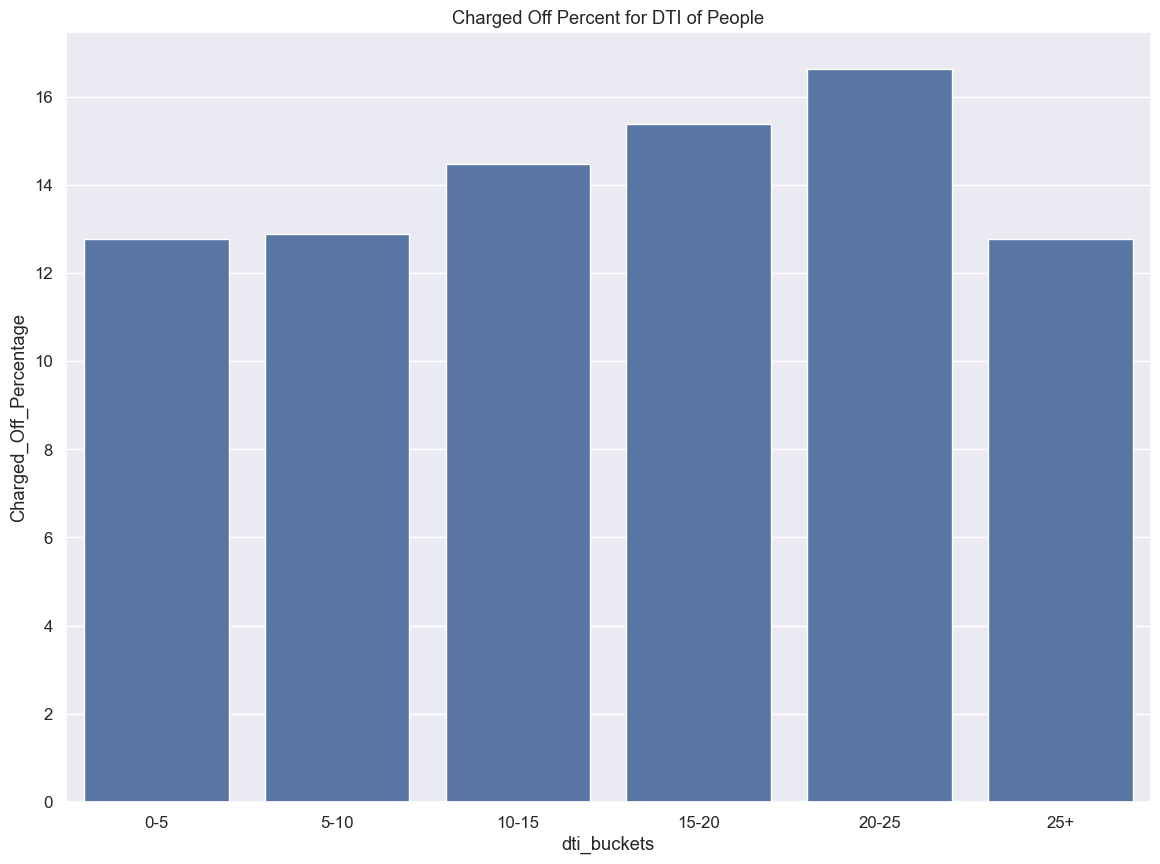

In [74]:
plt.figure(figsize=(14,10))

sns.barplot(y=dti_status_group['Charged_Off_Percentage'],x=dti_status_group['dti_buckets'])
plt.title("Charged Off Percent for DTI of People")
plt.show()

- We can see that the majority of customers in the 15 to 25 dti have struggled to pay off the amount

In [75]:
# lets group the data where we can have percent of people who have been charged off for each annual income buckets that we created earlier
income_status_group = new_data.groupby(['annual_inc_buckets','loan_status']).count().unstack()['annual_inc'].reset_index()

In [76]:
# Creating the percentage column
income_status_group['Charged_Off_Percentage'] = (income_status_group['Charged Off']/(income_status_group['Charged Off'] + income_status_group['Current'] + income_status_group['Fully Paid']))*100

In [77]:
income_status_group

loan_status,annual_inc_buckets,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,0-20000,233,9,933,19.83
1,20000-40000,1507,170,6991,17.39
2,40000-60000,1725,345,9528,14.87
3,60000-80000,1023,240,6596,13.02
4,80000+,696,230,5466,10.89


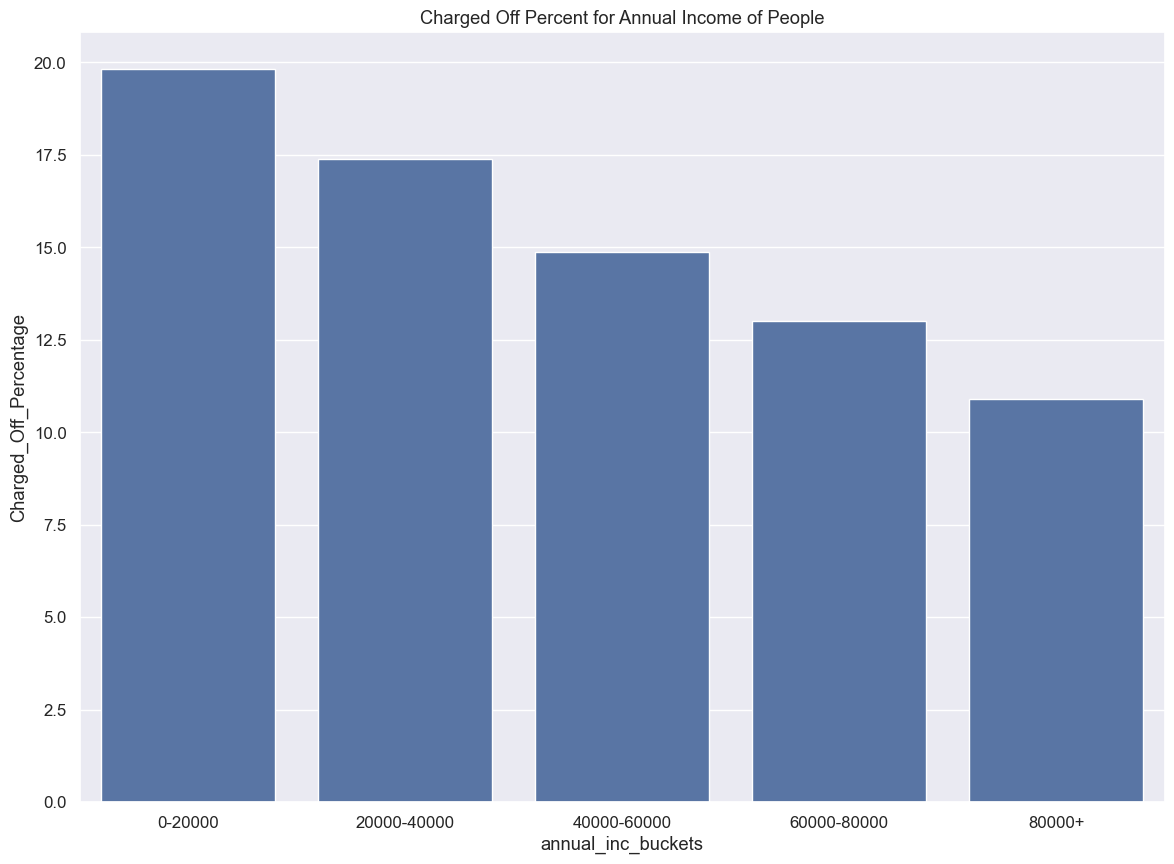

In [78]:
plt.figure(figsize=(14,10))

sns.barplot(y=income_status_group['Charged_Off_Percentage'],x=income_status_group['annual_inc_buckets'])
plt.title("Charged Off Percent for Annual Income of People")
plt.show()

- Yes as you can see above these 2 factors Annual Income and DTI (Debt To Income Ratio) both can become the deciding factors for giving loans

> ### Conclusion
- For some reason Lending Club is giving out loans to people who have a very low income but also there DTI is bad

In [79]:
# lets also check interest rates for these loans
# lets group the data where we can have percent of people who have been charged off for each annual income buckets that we created earlier
intrate_status_group = new_data.groupby(['int_rate_buckets','loan_status']).count().unstack()['int_rate'].reset_index()

In [80]:
# Creating the percentage column
intrate_status_group['Charged_Off_Percentage'] = (intrate_status_group['Charged Off']/(intrate_status_group['Charged Off'] + intrate_status_group['Current'] + intrate_status_group['Fully Paid']))*100

In [81]:
intrate_status_group['Charged_Off_Percentage'] = intrate_status_group['Charged_Off_Percentage'].fillna(0)

In [82]:
intrate_status_group

loan_status,int_rate_buckets,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,0-3,0,0,0,0.00
1,3-6,54,2,1179,4.37
2,6-10,738,72,9276,7.32
3,10-13,1489,311,9079,13.69
4,13-16,1533,225,6744,18.03
5,16+,1370,384,3236,27.45


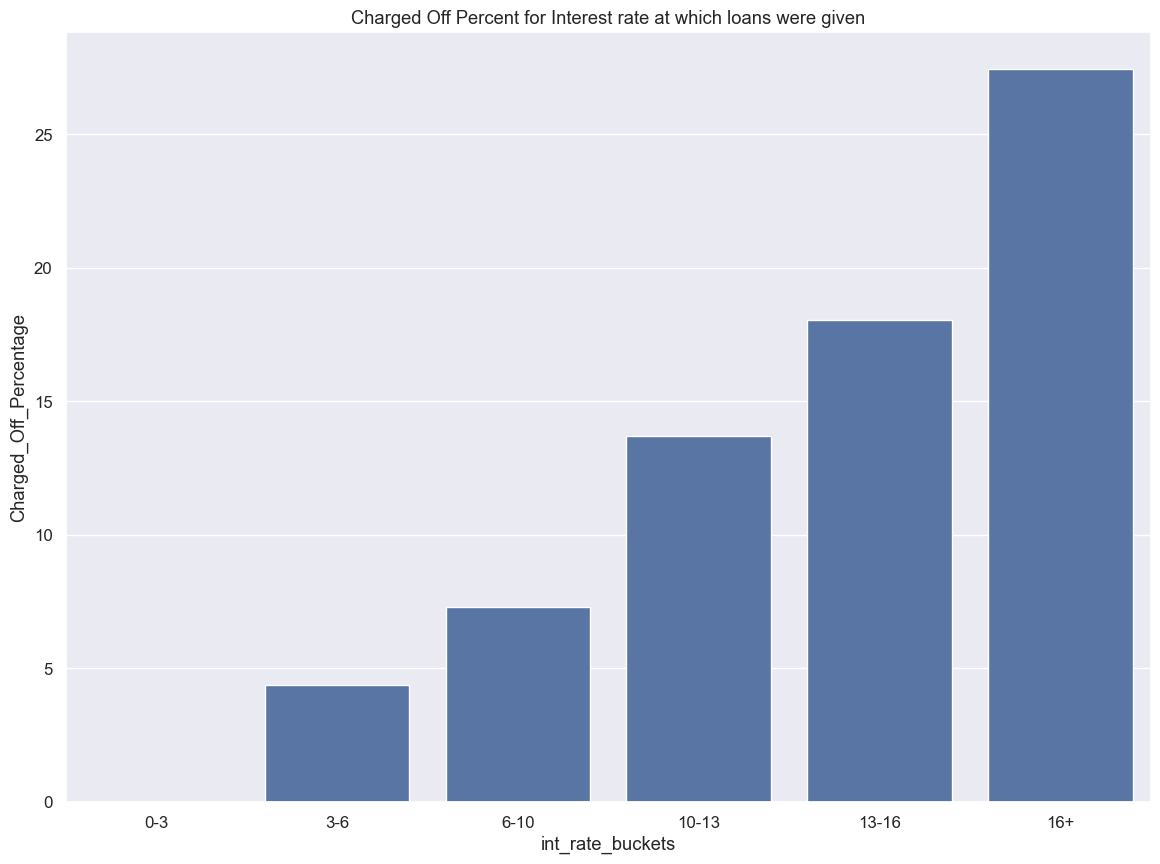

In [83]:
plt.figure(figsize=(14,10))

sns.barplot(y=intrate_status_group['Charged_Off_Percentage'],x=intrate_status_group['int_rate_buckets'])
plt.title("Charged Off Percent for Interest rate at which loans were given")
plt.show()

- We can see higher the interest the higher the risk of defaulting

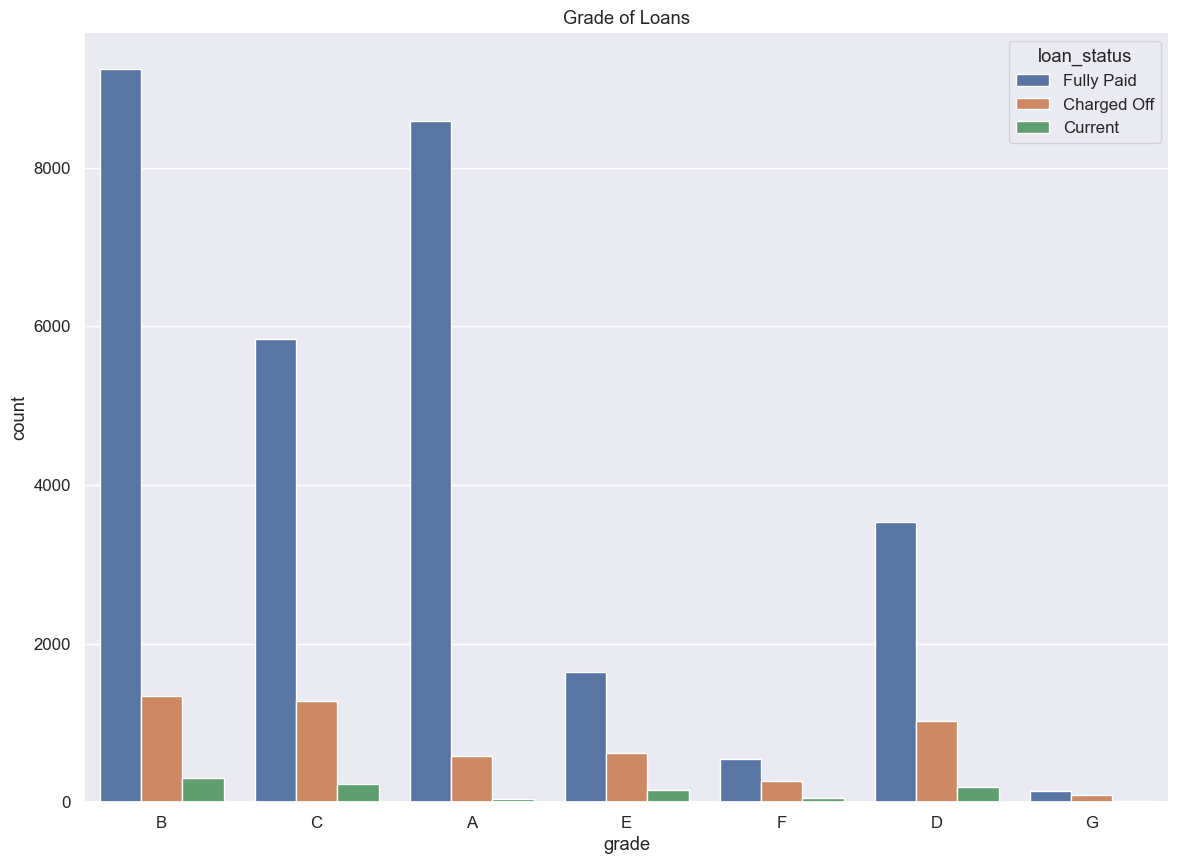

In [84]:
plt.figure(figsize=(14,10))
sns.countplot(x='grade',hue='loan_status',data=new_data)
plt.title("Grade of Loans")
plt.show()

- We can see that A grade loans are very easy profit for the business with less risk and better rewards

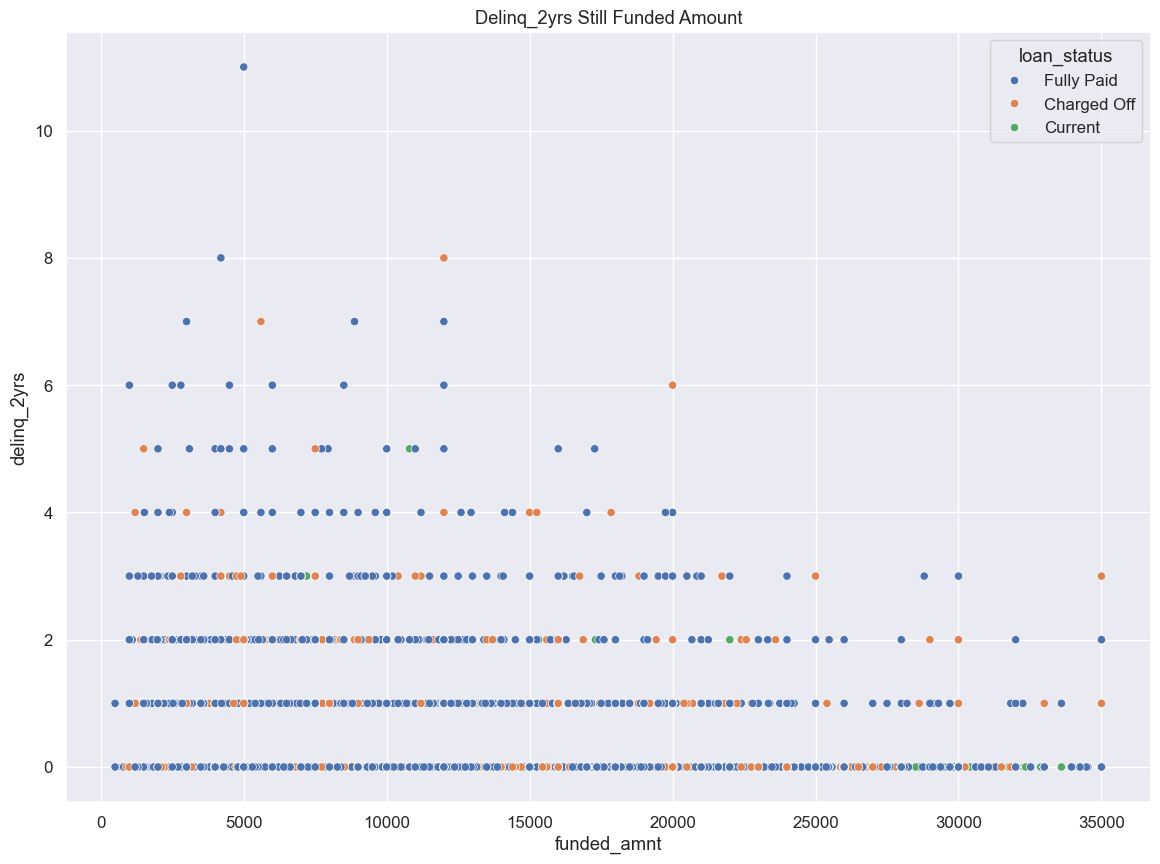

In [85]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=new_data,x='funded_amnt',y='delinq_2yrs',hue='loan_status')
plt.title("Delinq_2yrs Still Funded Amount")
plt.show()

- We dont see any clear pattern for deliquency in 2 years with regards to funded amount for Charged off category

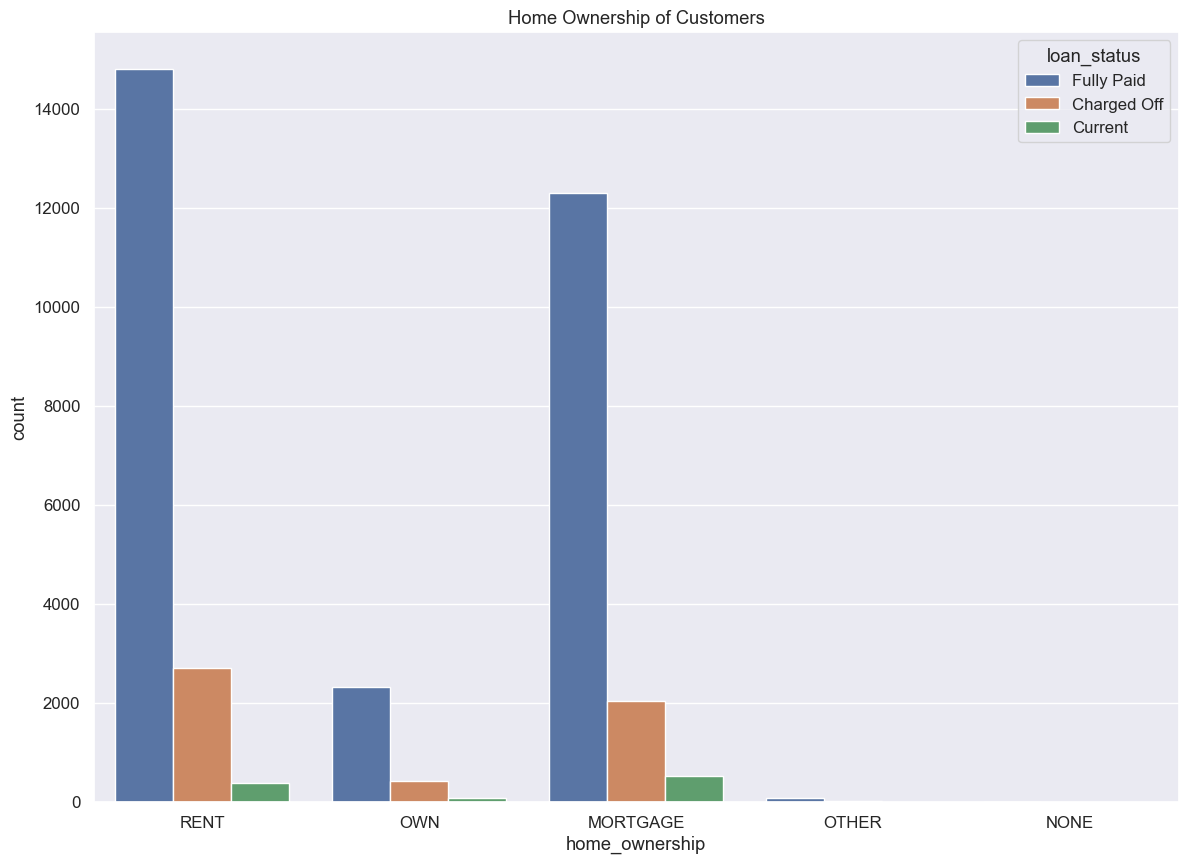

In [86]:
plt.figure(figsize=(14,10))
sns.countplot(x='home_ownership',hue='loan_status',data=new_data)
plt.title("Home Ownership of Customers")
plt.show()

- we can see that rent and mortgage are the major contributors for defaulters

In [102]:
home_ownership_status = new_data.groupby(['home_ownership','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [104]:
home_ownership_status.fillna(0,inplace=True)

In [106]:
# Creating the percentage column
home_ownership_status['Charged_Off_Percentage'] = (home_ownership_status['Charged Off']/(home_ownership_status['Charged Off'] + home_ownership_status['Current'] + home_ownership_status['Fully Paid']))*100

In [107]:
home_ownership_status

loan_status,home_ownership,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,MORTGAGE,2044.00,530.00,12297.00,13.74
1,NONE,0.00,0.00,2.00,0.00
2,OTHER,17.00,0.00,71.00,19.32
3,OWN,418.00,77.00,2327.00,14.81
4,RENT,2705.00,387.00,14817.00,15.10


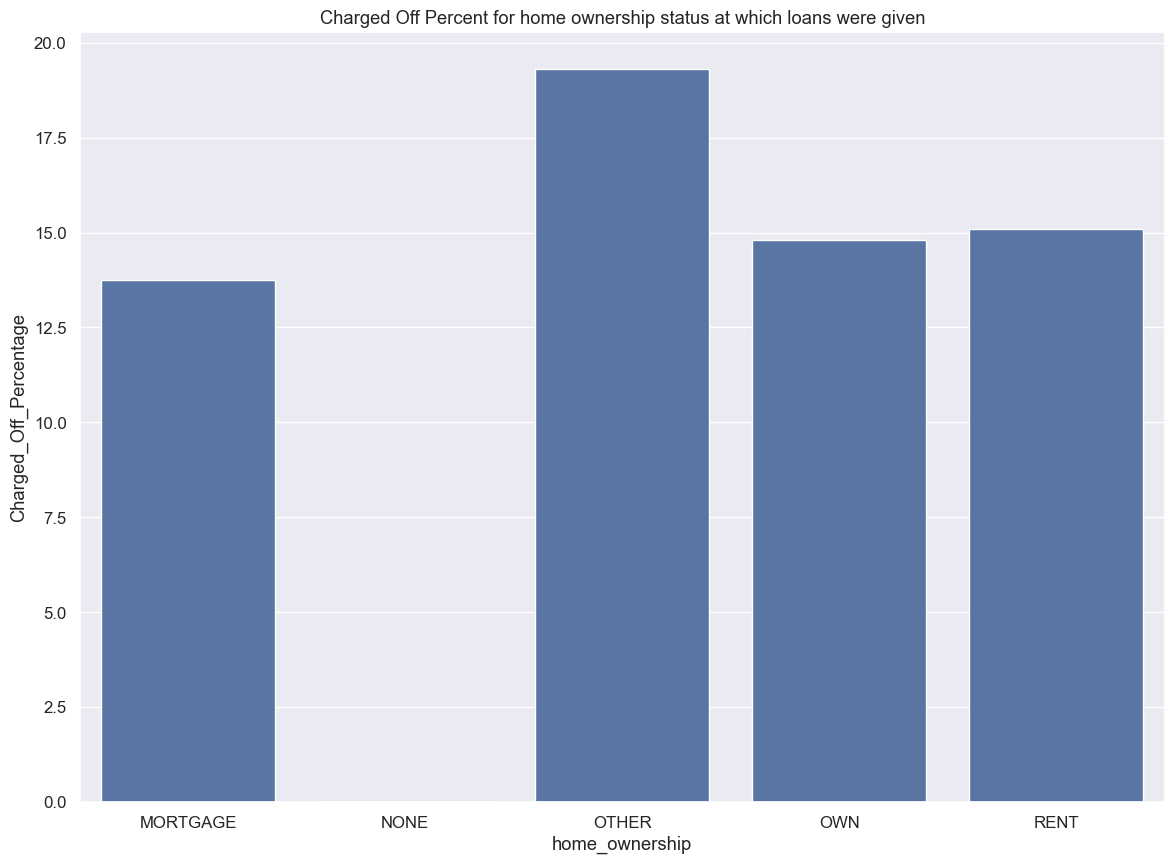

In [108]:
plt.figure(figsize=(14,10))

sns.barplot(y=home_ownership_status['Charged_Off_Percentage'],x=home_ownership_status['home_ownership'])
plt.title("Charged Off Percent for home ownership status at which loans were given")
plt.show()

- we can see that although we dont have any sizable amount of homeownership labelled as Other but still percentage wise it is where most defaulters are followed by Rent Category

In [110]:
veri_src_status = new_data.groupby(['verification_status','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [111]:
# Creating the percentage column
veri_src_status['Charged_Off_Percentage'] = (veri_src_status['Charged Off']/(veri_src_status['Charged Off'] + veri_src_status['Current'] + veri_src_status['Fully Paid']))*100

In [112]:
veri_src_status

loan_status,verification_status,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,Not Verified,2034,222,13669,12.77
1,Source Verified,1324,267,7370,14.78
2,Verified,1826,505,8475,16.90


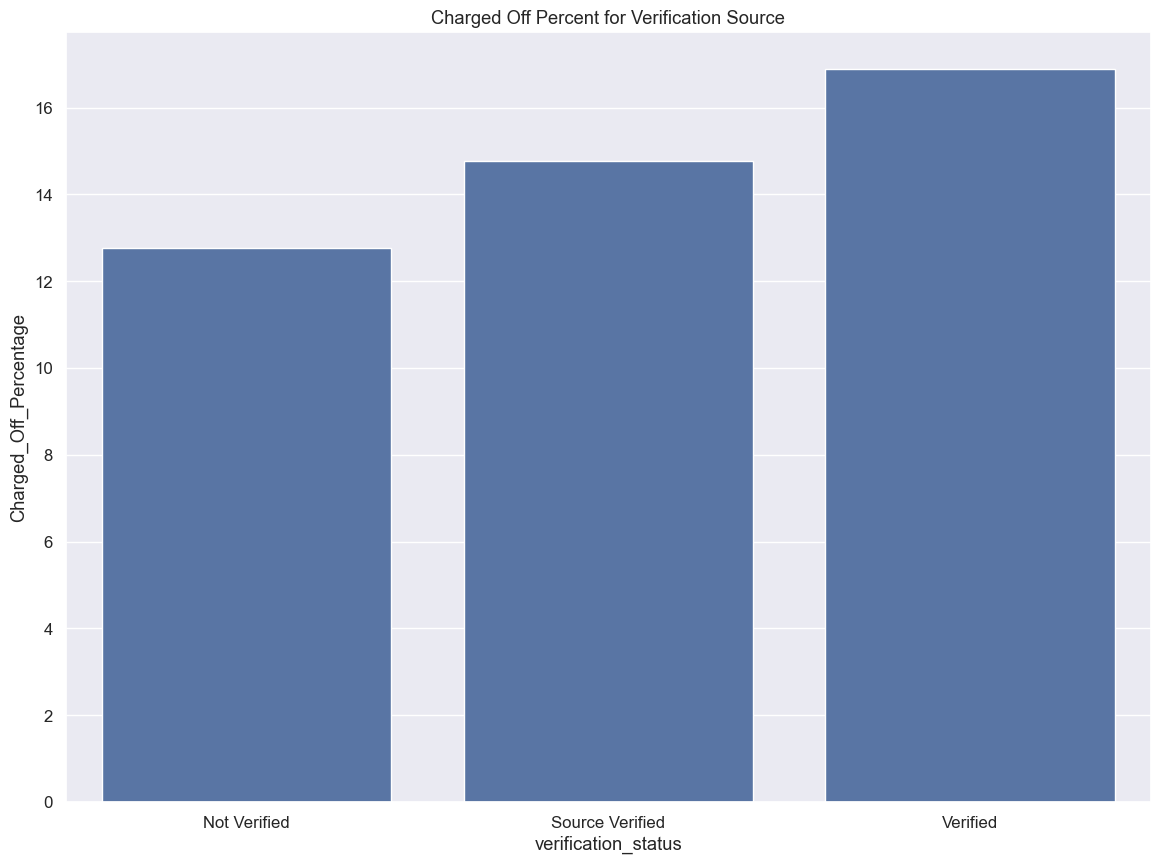

In [113]:
plt.figure(figsize=(14,10))

sns.barplot(y=veri_src_status['Charged_Off_Percentage'],x=veri_src_status['verification_status'])
plt.title("Charged Off Percent for Verification Source")
plt.show()

- This is very shocking that we might think that the loans where the verification status is verified wont be a place where there are more defaulters but out analysis show something else its actually majority of people who are verified turning up as defaulters

In [124]:
state_wise_status = new_data.groupby(['addr_state','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [127]:
state_wise_status.fillna(0,inplace=True)

In [128]:
# Creating the percentage column
state_wise_status['Charged_Off_Percentage'] = (state_wise_status['Charged Off']/(state_wise_status['Charged Off'] + state_wise_status['Current'] + state_wise_status['Fully Paid']))*100

In [134]:
top5_state_wise_status = state_wise_status.sort_values(by='Charged_Off_Percentage',ascending=False)[:5]

In [135]:
top5_state_wise_status

loan_status,addr_state,Charged Off,Current,Fully Paid,Charged_Off_Percentage
28,NE,3.00,0.00,2.00,60.00
32,NV,98.00,15.00,336.00,21.83
13,ID,1.00,0.00,4.00,20.00
0,AK,13.00,1.00,54.00,19.12
40,SD,12.00,2.00,49.00,19.05


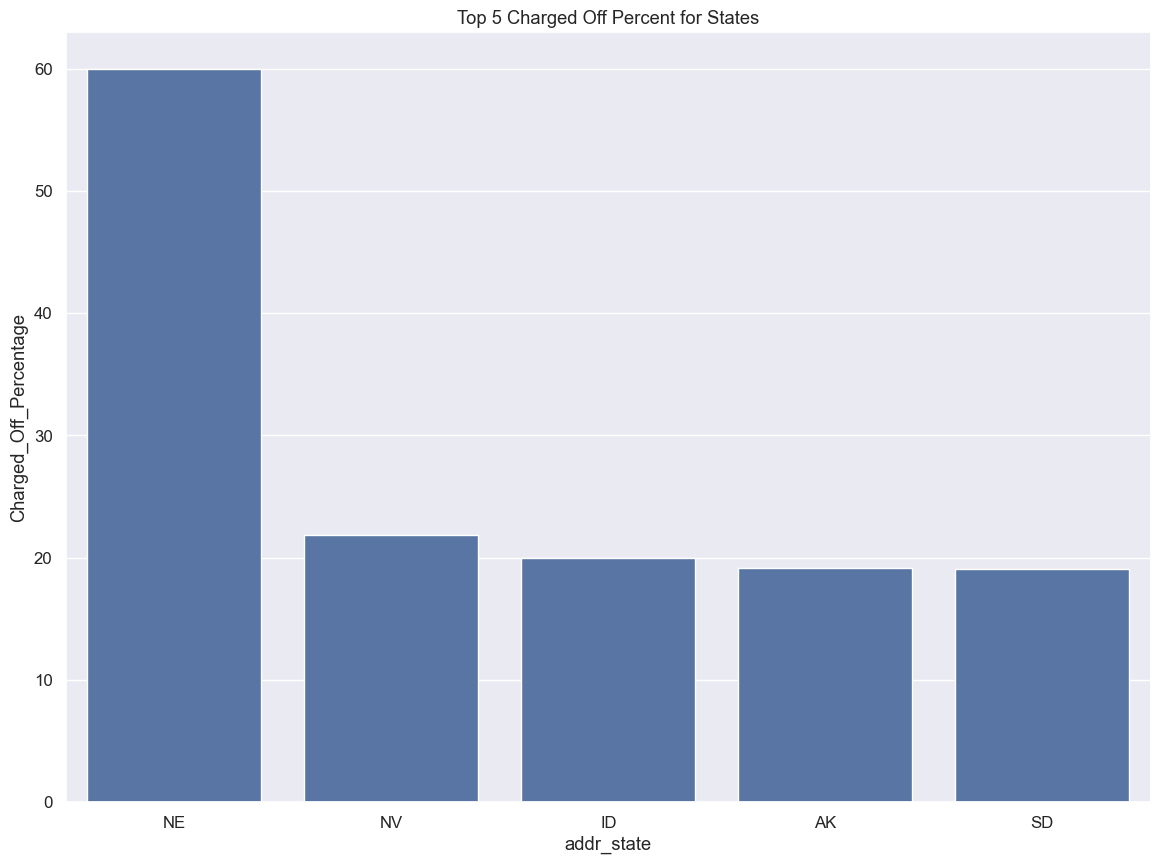

In [136]:
plt.figure(figsize=(14,10))

sns.barplot(y=top5_state_wise_status['Charged_Off_Percentage'],x=top5_state_wise_status['addr_state'])
plt.title("Top 5 Charged Off Percent for States")
plt.show()

- We can see that a very high number of defaulters are from NE state

In [140]:
zip_code_status = new_data.groupby(['zip_code','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [141]:
zip_code_status.fillna(0,inplace=True)

In [142]:
# Creating the percentage column
zip_code_status['Charged_Off_Percentage'] = (zip_code_status['Charged Off']/(zip_code_status['Charged Off'] + zip_code_status['Current'] + zip_code_status['Fully Paid']))*100

In [143]:
zip_code_status

loan_status,zip_code,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,010xx,14.00,2.00,78.00,14.89
1,011xx,1.00,0.00,13.00,7.14
2,012xx,1.00,1.00,9.00,9.09
3,013xx,3.00,1.00,9.00,23.08
4,014xx,7.00,1.00,23.00,22.58
...,...,...,...,...,...
810,995xx,4.00,0.00,22.00,15.38
811,996xx,2.00,0.00,10.00,16.67
812,997xx,6.00,1.00,13.00,30.00
813,998xx,0.00,0.00,9.00,0.00


In [154]:
zip_code_status.sort_values(by='Charged_Off_Percentage',ascending=False)[7:12]

loan_status,zip_code,Charged Off,Current,Fully Paid,Charged_Off_Percentage
606,746xx,5.00,0.00,2.00,71.43
466,561xx,5.00,0.00,2.00,71.43
565,685xx,2.00,0.00,1.00,66.67
435,499xx,2.00,0.00,2.00,50.00
656,798xx,1.00,0.00,1.00,50.00


In [155]:
top5_zip_code_status = zip_code_status.sort_values(by='Charged_Off_Percentage',ascending=False)[7:12]

In [156]:
top5_zip_code_status

loan_status,zip_code,Charged Off,Current,Fully Paid,Charged_Off_Percentage
606,746xx,5.00,0.00,2.00,71.43
466,561xx,5.00,0.00,2.00,71.43
565,685xx,2.00,0.00,1.00,66.67
435,499xx,2.00,0.00,2.00,50.00
656,798xx,1.00,0.00,1.00,50.00


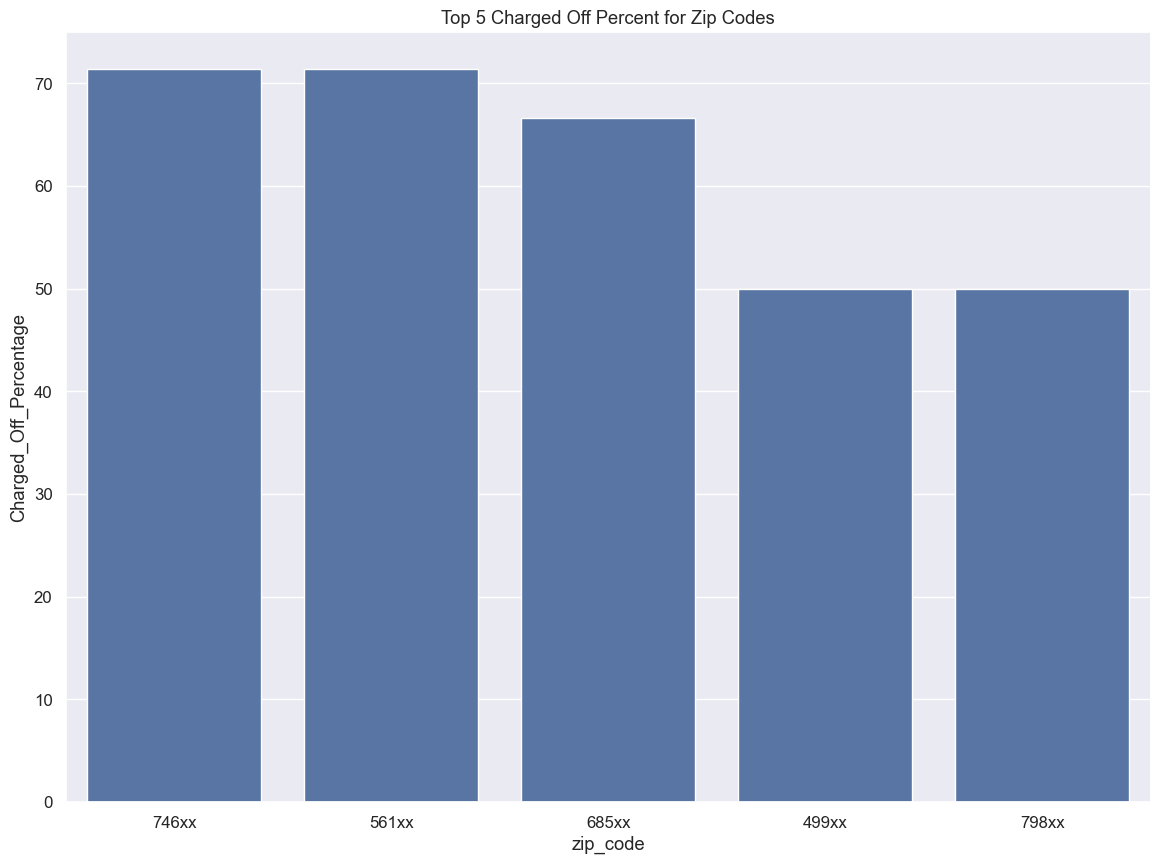

In [158]:
plt.figure(figsize=(14,10))

sns.barplot(y=top5_zip_code_status['Charged_Off_Percentage'],x=top5_zip_code_status['zip_code'])
plt.title("Top 5 Charged Off Percent for Zip Codes")
plt.show()

- These are some of the zip codes on which the company has to keep an eye

In [161]:
month_wise_status = new_data.groupby(['month','loan_status']).count().unstack()['loan_amnt'].reset_index()

In [162]:
month_wise_status.fillna(0,inplace=True)

In [163]:
# Creating the percentage column
month_wise_status['Charged_Off_Percentage'] = (month_wise_status['Charged Off']/(month_wise_status['Charged Off'] + month_wise_status['Current'] + month_wise_status['Fully Paid']))*100

In [164]:
month_wise_status

loan_status,month,Charged Off,Current,Fully Paid,Charged_Off_Percentage
0,1,299.00,0.00,1842.00,13.97
1,2,267.00,0.00,1870.00,12.49
2,3,320.00,1.00,2116.00,13.13
3,4,336.00,3.00,2227.00,13.09
4,5,431.00,71.00,2217.00,15.85
5,6,434.00,92.00,2405.00,14.81
6,7,436.00,114.00,2605.00,13.82
7,8,437.00,108.00,2602.00,13.89
8,9,512.00,133.00,2582.00,15.87
9,10,523.00,146.00,2815.00,15.01


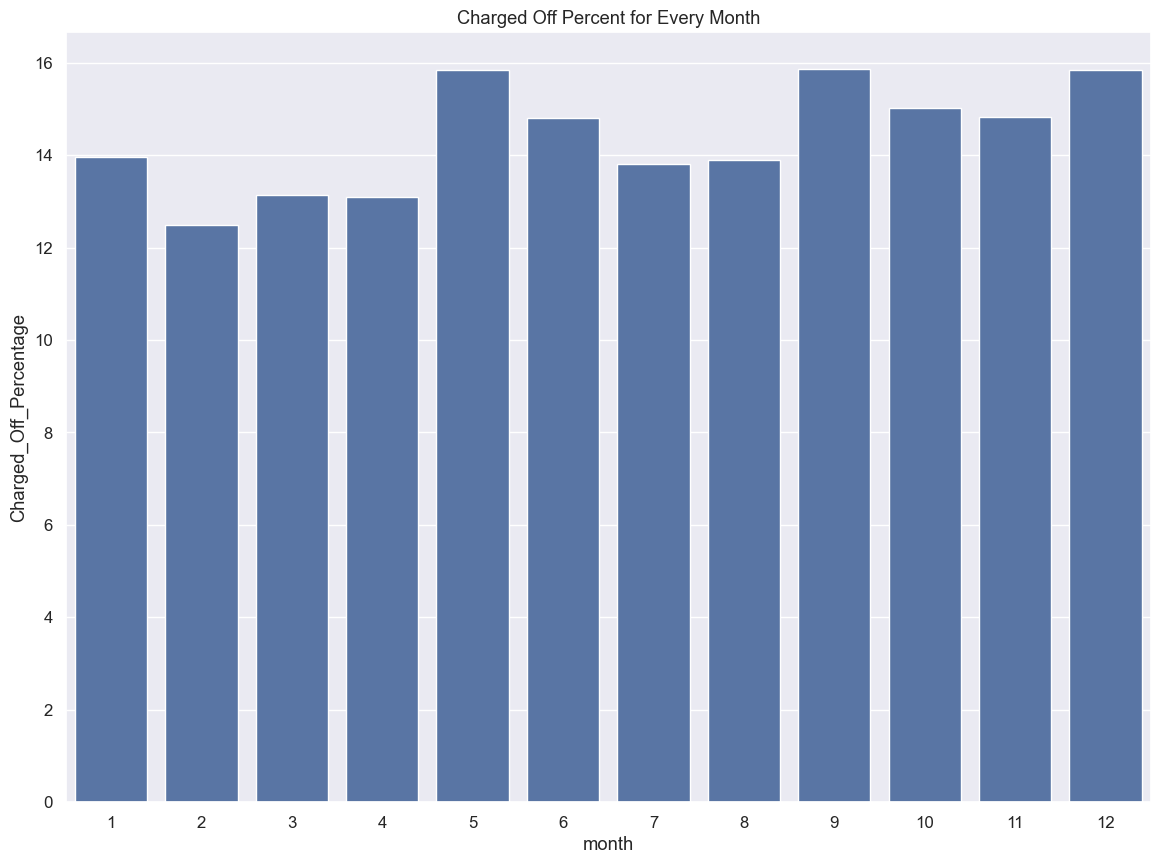

In [166]:
plt.figure(figsize=(14,10))

sns.barplot(y=month_wise_status['Charged_Off_Percentage'],x=month_wise_status['month'])
plt.title("Charged Off Percent for Every Month")
plt.show()

- We can see in the 5th, 9th and 12th months have a spike in defaulters

> ## Final Conclusion

- loan amount,dti,annual income, interest rates,home ownership, verification status, state, zip codes and some months are some of the factors where we found major number driver variables